### **Media Prediction EDA**

**Taxonomy**

1.1 MediaDive taxonomic diversity

**Enzymes**

2.1 taxa2ec enzyme diversity

2.2 media2ec enzyme diversity

2.3 Comparison between taxa2ec and media2ec

2.4 Comparison of taxa2ec source overlap

2.5 Heatmap

**Cofactors**

3.1 ec2metals (taxa2ec)

3.2 ec2metals (media2ec)

3.3 ec2metals (subset of isolates)

3.4 Comparison of ec2metals (all cofactors)

3.5 Compoarison of ec2metals (metal cofactors)

**Metabolites**

4.1 Metabolite production

4.2 Metabolite utilization

4.3 Metabolite co-occurrence

*All dataframes loaded can be constructed using data.ipynb, "Comparison" => normalized, ...*

In [1]:
import pandas as pd
import ast
import os
DATA_DIR = '~/Desktop/code/data/'

### Taxonomy

[1.1] MediaDive taxonomic diversity

In [51]:
md_df = pd.read_csv(os.path.join(DATA_DIR,"mediadive","mediadive-all.csv"), sep = ';')

import plotly.express as px

n = 50 #number of species we wanna show

# Plot the occurrence of enzymes across all of our selected taxa 
fig = px.bar(
    data_frame = md_df.value_counts('species').head(n).reset_index(),
    x="species",
    y="count",
    
    title="Species abundance in MediaDive (by strain count, top %i)" %n
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.update_yaxes(title='', visible=True, showticklabels=True)
fig.show()

### Enzymes

[2.1] taxa2ec enzyme diversity

In [52]:
data = pd.read_csv(os.path.join(DATA_DIR, 'taxa2ec-final.csv'), low_memory=False)
ecs = data.copy()

# Summing the abundance of enzymes across our taxa related to different enzyme groups
enzyme_df = ecs.value_counts("ec").reset_index().copy() #ecs.value_counts originally
enzyme_df['Group'] = enzyme_df['ec'].apply(lambda x: x.strip().split('.')[0])
grouped_df = enzyme_df.groupby('Group')['count'].sum().reset_index()
grouped_df.columns = ['Group','Total Count']
# Adding information on the type of enzymes
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df['Class'] = ec_class

taxa_enzyme_counts = grouped_df[['Group','Class','Total Count']]
print(taxa_enzyme_counts)

import plotly.express as px

# Plot the occurrence of enzymes across all of our selected taxa 
fig2 = px.bar(taxa_enzyme_counts, x="Class", y="Total Count")
fig2.show()


  Group            Class  Total Count
0     1  Oxidoreductases       619571
1     2     Transferases      1455538
2     3       Hydrolases       951266
3     4           Lyases       426622
4     5       Isomerases       310414
5     6          Ligases       480922
6     7     Translocases       125212


[2.2] media2ec enzyme diversity

In [53]:
data = pd.read_csv(os.path.join(DATA_DIR, 'media2ec-explode.csv'), low_memory=False)
ecs = data.copy()

# Summing the abundance of enzymes across our taxa related to different enzyme groups
enzyme_df = ecs.value_counts("ec_KEGG").reset_index().copy() #ecs.value_counts originally
enzyme_df['Group'] = enzyme_df["ec_KEGG"].apply(lambda x: x.strip().split('.')[0])
grouped_df = enzyme_df.groupby('Group')['count'].sum().reset_index()
grouped_df.columns = ['Group','Total Count']

# Create filler rows for classes which have 0 counts (manual step) ... no group 7 translocases in dataset
filler_dict = {'Group':[7], 'Total Count':[0]}
filler = pd.DataFrame(filler_dict)
grouped_df = pd.concat([grouped_df,filler], ignore_index = True).copy()
grouped_df['Group'] = grouped_df['Group'].astype(int)
grouped_df = grouped_df.sort_values('Group')
grouped_df.reset_index()

# Adding information on the type of enzymes
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df['Class'] = ec_class

media_enzyme_counts = grouped_df[['Group','Class','Total Count']]
print(media_enzyme_counts)

import plotly.express as px

# Plot the occurrence of enzymes across all of our selected media 
fig3 = px.bar(media_enzyme_counts, x="Class", y="Total Count")
fig3.show()


   Group            Class  Total Count
0      1  Oxidoreductases        21628
1      2     Transferases         3021
2      3       Hydrolases         1139
3      4           Lyases           17
4      5       Isomerases            2
5      6          Ligases          358
6      7     Translocases            0


[2.3] Comparison of enzyme diversity

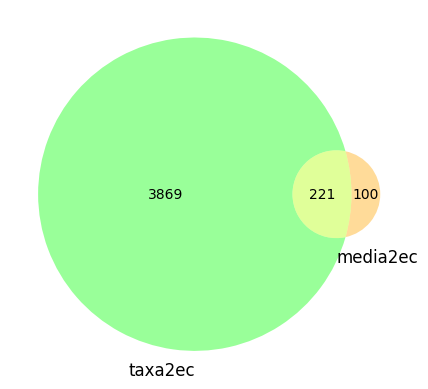

In [54]:
# Convert taxa2ec info to list
taxa2ec_df = pd.read_csv(os.path.join(DATA_DIR, 'taxa2ec-final.csv'), low_memory=False)
taxa2ec_list = taxa2ec_df['ec'].to_list()

# Convert kegg2ec info to list
media2ec_df = pd.read_csv(os.path.join(DATA_DIR, 'media2ec-explode.csv'), low_memory=False)
media2ec_list = media2ec_df['ec_KEGG'].to_list()

from matplotlib import pyplot as plt
from matplotlib_venn import venn2

venn2(
    subsets=[
        set(taxa2ec_list),
        set(media2ec_list)
    ],
    set_labels=[
        "taxa2ec",
        "media2ec"
    ],
    set_colors=[
        "lime",
        "orange"
    ]
)

In [55]:
# Make a list of the common ec's between these two lists
set1 = set(taxa2ec_list)
set2 = set(media2ec_list)
common = list(set1.intersection(set2))

# Put the list into a dataframe
dict = {'ec': common}
ecs = pd.DataFrame(dict)

# Summing the abundance of enzymes across our taxa related to different enzyme groups
enzyme_df = ecs.value_counts("ec").reset_index().copy() #ecs.value_counts originally
enzyme_df['Group'] = enzyme_df['ec'].apply(lambda x: x.strip().split('.')[0])
grouped_df = enzyme_df.groupby('Group')['count'].sum().reset_index()
grouped_df.columns = ['Group','Total Count']

# Create filler rows for classes which have 0 counts (manual step)
filler_dict = {'Group':[5,7], 'Total Count':[0,0]}
filler = pd.DataFrame(filler_dict)
grouped_df = pd.concat([grouped_df,filler], ignore_index = True).copy()
grouped_df['Group'] = grouped_df['Group'].astype(int)
grouped_df = grouped_df.sort_values('Group')
grouped_df.reset_index()

# Adding information on the type of enzymes (NOTE: no enzymes from class 5 or 7, so removed these labels...could alternatively have a place holder above)
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df['Class'] = ec_class

enzyme_counts = grouped_df[['Group','Class','Total Count']]
print(enzyme_counts)

import plotly.express as px

# Plot the occurrence of enzymes across our overlapping dataset
fig4 = px.bar(enzyme_counts, x="Class", y="Total Count") #, title="Overlap of enzyme classes between taxa and media:"
fig4.show()

   Group            Class  Total Count
0      1  Oxidoreductases          143
1      2     Transferases           50
2      3       Hydrolases           22
3      4           Lyases            4
5      5       Isomerases            0
4      6          Ligases            2
6      7     Translocases            0


Normalized barplots

In [125]:
# Dataframes to show enzyme class proportions relative to each dataset

df1 = taxa_enzyme_counts.copy() 
sum1 = df1['Total Count'].sum(axis=0)
df1['Taxa_Proportion'] = df1['Total Count'].div(sum1)

df2 = media_enzyme_counts.copy() 
sum2 = df2['Total Count'].sum(axis=0)
df2['Media_Proportion'] = df2['Total Count'].div(sum2)

df3 = enzyme_counts.copy() 
sum3 = df3['Total Count'].sum(axis=0)
df3['Overlap_Proportion'] = df3['Total Count'].div(sum3)


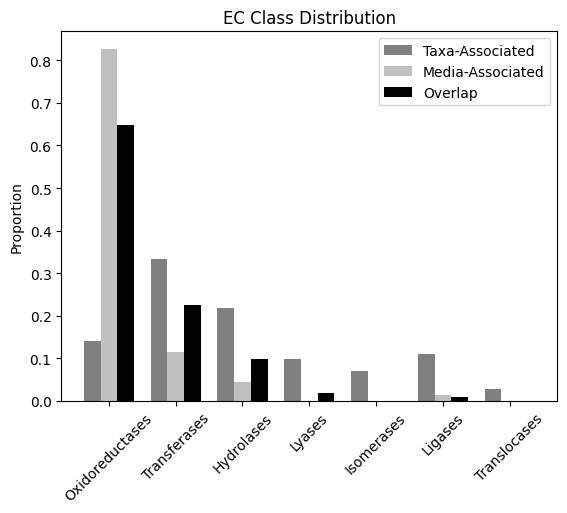

In [126]:
import numpy as np 
import matplotlib.pyplot as plt 
  
N = 7
ind = np.arange(N)  
width = 0.25
  
xvals = df1['Taxa_Proportion']
bar1 = plt.bar(ind, xvals, width, color = 'grey') 
  
yvals = df2['Media_Proportion']
bar2 = plt.bar(ind+width, yvals, width, color='silver') 
  
zvals = df3['Overlap_Proportion']
bar3 = plt.bar(ind+width*2, zvals, width, color = 'black') 
  
#plt.xlabel("Enzyme Class") 
plt.ylabel("Proportion") 
plt.title("EC Class Distribution") 
  
plt.xticks(ind+width,['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases'],rotation=45) 
plt.legend( (bar1, bar2, bar3), ('Taxa-Associated', 'Media-Associated', 'Overlap') ) 
plt.show() 

In [68]:

#EC 1: Oxidoreductases – Enzymes that catalyze oxidation-reduction reactions.
#EC 2: Transferases – Enzymes that transfer a functional group (e.g., a methyl or phosphate group).
#EC 3: Hydrolases – Enzymes that catalyze the hydrolysis of various bonds.
#EC 4: Lyases – Enzymes that break various chemical bonds by means other than hydrolysis/oxidation, often forming a new double-bond or ring structure.
#EC 5: Isomerases – Enzymes that catalyze the transfer of groups within molecules to yield isomeric forms.
#EC 6: Ligases – Enzymes that join two molecules together, typically using ATP.
#EC 7: Translocases – Enzymes that catalyze the movement of ions or molecules across membranes or their separation within membranes.

[2.4] Comparison of ec sources for taxa2ec

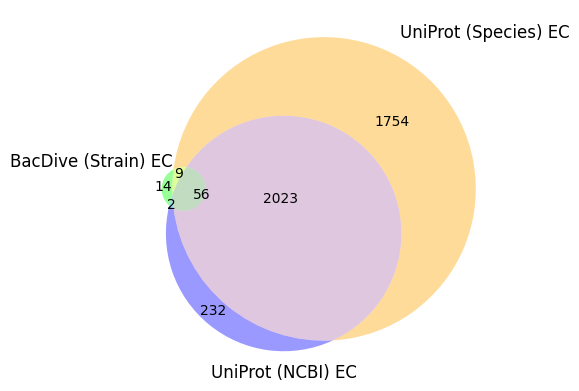

In [61]:
data = pd.read_csv(os.path.join(DATA_DIR, 'taxa2ec-final.csv'), low_memory=False)

substring1 = 'bacdive'
filter1 = data['source'].str.contains(substring1) # create filter
bacdive_df = data[filter1].copy()

substring2 = 'uniprot'
filter2 = data['source'].str.contains(substring2)
uniprot_df = data[filter2].copy()

substring3 = 'ncbi'
filter3 = data['source'].str.contains(substring3)
ncbi_df = data[filter3].copy()

from matplotlib import pyplot as plt
from matplotlib_venn import venn3

venn3(
    subsets=[
        set(bacdive_df["ec"]),
        set(uniprot_df["ec"]),
        set(ncbi_df["ec"])
    ],
    set_labels=[
        "BacDive (Strain) EC",
        "UniProt (Species) EC",
        "UniProt (NCBI) EC"
    ],
    set_colors=[
        "lime",
        "orange",
        "blue"
    ]
)

# BacDive incomplete parsing of ECs? Or really just that small of a dataset? (using set function removes duplicates)

[2.5] Heatmap

In [62]:
data = pd.read_csv(os.path.join(DATA_DIR, 'taxa2ec-final.csv'), low_memory=False)

data_heatmap = data[["media_id", "taxon_id"]].drop_duplicates()
data_heatmap["count"] = 1
data_heatmap = data_heatmap.pivot(index="taxon_id", columns="media_id", values="count")

import plotly.express as px

#px.imshow(data_heatmap, width=1500, height=1500)

### Cofactors

[3.1] ec2metals (taxa2ec)

In [83]:
# Load cofactor info and remove entries w/ non-specific EC numbers (i.e. 1.1.1.-, 1.1.-.-, etc.)
cofactors = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-taxa2ec.csv"))

substring = '-'
filter = cofactors['Query EC'].str.contains(substring)
cofactors = cofactors[~filter]

import plotly.express as px

data = cofactors.copy()
fig = px.bar(
    data_frame = data.value_counts("CofactorFinal").reset_index(),
    x="CofactorFinal",
    y="count",
    title="taxa2ec cofactors"
    #color="Class"
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.show()

[3.2] ec2metals (media2ec)

In [84]:
# Load cofactor info and remove entries w/ non-specific EC numbers (i.e. 1.1.1.-, 1.1.-.-, etc.)
cofactors = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-media2ec.csv"))

substring = '-'
filter = cofactors['Query EC'].str.contains(substring)
cofactors = cofactors[~filter]

import plotly.express as px

data = cofactors.copy()
fig = px.bar(
    data_frame = data.value_counts("CofactorFinal").reset_index(),
    x="CofactorFinal",
    y="count",
    title="media2ec cofactors"
    #color="Class"
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.show()

[3.3] ec2metals (subset of isolates)

In [85]:
# Load cofactor info and remove entries w/ non-specific EC numbers (i.e. 1.1.1.-, 1.1.-.-, etc.)
cofactors = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-subset.csv"))

substring = '-'
filter = cofactors['Query EC'].str.contains(substring)
cofactors = cofactors[~filter]

import plotly.express as px

data = cofactors.copy()
fig = px.bar(
    data_frame = data.value_counts("CofactorFinal").reset_index(),
    x="CofactorFinal",
    y="count",
    title="Isolate subset cofactors"
    #color="Class"
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.show()

[3.4] Cofactor comparison (all)

In [183]:
# Load dataframes
taxa2ec = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-taxa2ec.csv"))
media2ec = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-media2ec.csv"))
subset = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-subset.csv"))

# Filter non-specific EC numbers
substring = '-'
filter1 = taxa2ec['Query EC'].str.contains(substring)
filter2 = media2ec['Query EC'].str.contains(substring)
filter3 = subset['Query EC'].str.contains(substring)

taxa2ec = taxa2ec[~filter1]
media2ec = media2ec[~filter2]
subset = subset[~filter3]

#Create, merge, format counts 
cf_df1 = taxa2ec["CofactorFinal"].value_counts().reset_index()
sum1 = cf_df1["count"].sum(axis=0)
cf_df1['Taxa_Proportion'] = cf_df1['count'].div(sum1)

cf_df2 = media2ec["CofactorFinal"].value_counts().reset_index()
sum2 = cf_df2["count"].sum(axis=0)
cf_df2['Media_Proportion'] = cf_df2['count'].div(sum2)

cf_df3 = subset["CofactorFinal"].value_counts().reset_index()
sum3 = cf_df3["count"].sum(axis=0)
cf_df3['Subset_Proportion'] = cf_df3['count'].div(sum3)

# Merging counts
cf_df1 = cf_df1.rename(columns={"count": "count1"})
cf_df2 = cf_df2.rename(columns={"count": "count2"})
cf_df3 = cf_df3.rename(columns={"count": "count3"})

cf_df = pd.merge(left=cf_df1, right=cf_df2, on="CofactorFinal", how="left")
cf_df = pd.merge(left=cf_df, right=cf_df3, on="CofactorFinal", how="left")
cf_df = cf_df.fillna(0)

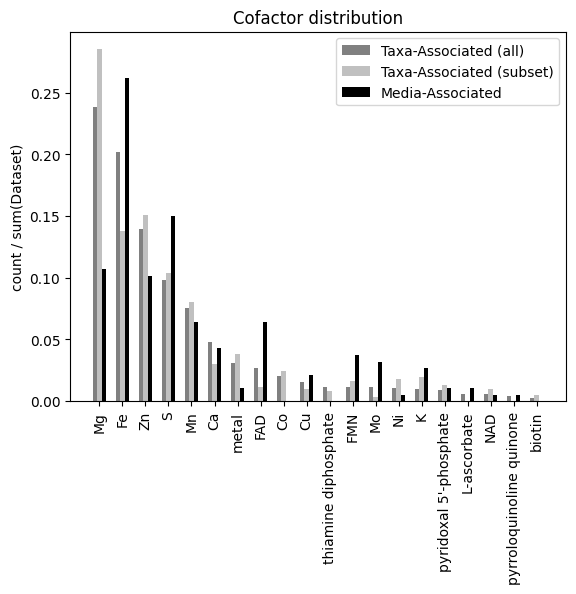

In [164]:
import numpy as np 
import matplotlib.pyplot as plt 

cf_df = cf_df.head(20) # Subset full dataframe; usual length is ~45 cofactors
N = 20

ind = np.arange(N)  
width = 0.2
  
xvals = cf_df['Taxa_Proportion']
bar1 = plt.bar(ind, xvals, width, color = 'grey') 
  
yvals = cf_df['Subset_Proportion']
bar2 = plt.bar(ind+width, yvals, width, color='silver') 
  
zvals = cf_df['Media_Proportion']
bar3 = plt.bar(ind+width*2, zvals, width, color = 'black') 
  
#plt.xlabel("Cofactor") 
plt.ylabel("count / sum(Dataset)") 
plt.title("Cofactor distribution") 
  
plt.xticks(ind+width,cf_df["CofactorFinal"],rotation=90) 
plt.legend( (bar1, bar2, bar3), ('Taxa-Associated (all)', 'Taxa-Associated (subset)', 'Media-Associated') ) 
plt.show() 

[3.5] Cofactor comparison (metals)

In [193]:
# Subset with ONLY metal cofactors:
metals = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "metals-list.csv"))
metals_list = metals['Metals'].to_list()
mask = cf_df['CofactorFinal'].isin(metals_list)
metal_cf = cf_df[mask].reset_index()

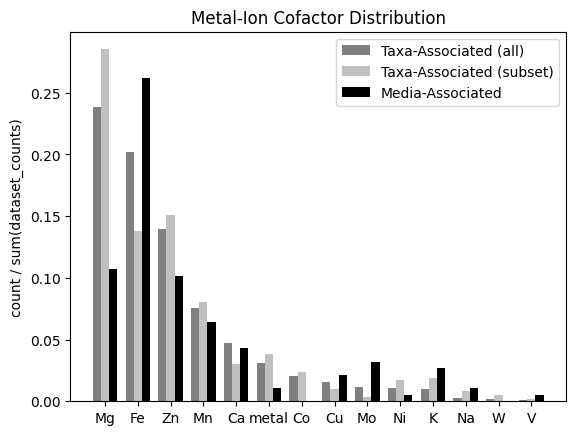

In [196]:
import numpy as np 
import matplotlib.pyplot as plt 

N = 14

ind = np.arange(N)  
width = 0.25
  
xvals = metal_cf['Taxa_Proportion']
bar1 = plt.bar(ind, xvals, width, color = 'grey') 
  
yvals = metal_cf['Subset_Proportion']
bar2 = plt.bar(ind+width, yvals, width, color='silver') 
  
zvals = metal_cf['Media_Proportion']
bar3 = plt.bar(ind+width*2, zvals, width, color = 'black') 
  
#plt.xlabel("Cofactor") 
plt.ylabel("count / sum(dataset_counts)") 
plt.title("Metal-Ion Cofactor Distribution") 
  
plt.xticks(ind+width,metal_cf["CofactorFinal"],rotation=0) 
plt.legend( (bar1, bar2, bar3), ('Taxa-Associated (all)', 'Taxa-Associated (subset)', 'Media-Associated') ) 
plt.show() 

### Metabolites

[4.1] Metabolite Production

In [108]:
df = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "metabol_pro.csv"))

import plotly.express as px

n = 10 #number of entries we wanna show
N = len(df) #number of total entries

# Plot the occurrence of enzymes across all of our selected taxa 
fig = px.bar(
    data_frame = df.value_counts('metabolite').head(n).reset_index(), #
    x="metabolite",
    y="count",
    
    title="Metabolite production (top %i of %i entries)" % (n, N)
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.update_yaxes(title='', visible=True, showticklabels=True)
fig.show()

In [112]:
# Subset for thermophiles
df["isolation_info"] = df["isolation_info"].astype(str).dropna().copy()

# Remove "nan" which aren't removed with .dropna()
nan = df["isolation_info"].str.contains("nan")
thermophiles = df["isolation_info"].str.contains("thermal")
subset = df[thermophiles & ~nan]

import plotly.express as px

n = len(subset)

# Plot the occurrence of enzymes across all of our selected taxa 
fig = px.bar(
    data_frame = subset.value_counts('metabolite').reset_index(), 
    x="metabolite",
    y="count",
    
    title="Metabolite production (thermophile subset, %i entries total)" %n
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.update_yaxes(title='', visible=True, showticklabels=True)
fig.show()

[4.2] Metabolite utilization

In [84]:
metabol_uti = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "metabol_uti.csv"))

import plotly.express as px

n = 100
N = len(metabol_uti)

# Plot the occurrence of enzymes across all of our selected taxa 
fig = px.bar(
    data_frame = metabol_uti.value_counts('metabolite').head(n).reset_index(), 
    x="metabolite",
    y="count",
    
    title="Metabolite utilization (top %i of %i entries total)" % (n, N)
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.update_yaxes(title='', visible=True, showticklabels=True)
fig.show()

[4.3] Co-occurence of metabolites produced/utilized (potentially useful for predicting symbioses)

In [159]:
# Load metabolite dataframes
utilization = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "metabol_uti.csv"))
production = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "metabol_pro.csv"))

# Make the metabolites produced into a set
mp_list = production["metabolite"].to_list()
mp_list = set(mp_list) #remove duplicates by turning into a set
mp_list = list(mp_list)

# Filter utilization for overlapping metabolites using mp_list
filter = utilization["metabolite"].isin(mp_list)
overlap = utilization[filter]

In [160]:
import plotly.express as px

n = 10
N = len(overlap)

# Plot the occurrence of enzymes across all of our selected taxa 
fig = px.bar(
    data_frame = overlap.value_counts('metabolite').head(n).reset_index(), 
    x="metabolite",
    y="count",
    
    title="Production counts for overlapping metabolites (top %i of %i entries total)" % (n, N)
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.update_yaxes(title='', visible=True, showticklabels=True)
fig.show()

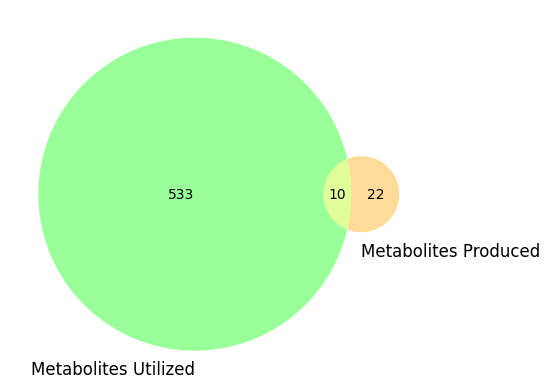

In [161]:
list1 = utilization["metabolite"].to_list()
list2 = production["metabolite"].to_list()

from matplotlib import pyplot as plt
from matplotlib_venn import venn2

venn2(
    subsets=[
        set(list1),
        set(list2)
    ],
    set_labels=[
        "Metabolites Utilized",
        "Metabolites Produced"
    ],
    set_colors=[
        "lime",
        "orange"
    ]
)

### In general, the metabolite utilization information from BacDive is much more intensive than the metabolite production information

Subsetting metabolites based on isolate information

In [162]:
utilization = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "metabol_uti.csv"))
production = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "metabol_pro.csv"))

def isolate_subset(df):
    df["isolation_info"] = df["isolation_info"].astype(str).dropna()
    nan = df["isolation_info"].str.contains("nan")
    isolates = df["isolation_info"].str.contains("thermal") ### REPLACE WITH SEARCH TERM ###
    result = df[isolates & ~nan]
    return result

uti_subset = isolate_subset(utilization)
pro_subset = isolate_subset(production)

# Make the metabolites produced into a list
metabolites = pro_subset["metabolite"].to_list()
mp_set = set(metabolites)
mp_list = list(mp_set)

# Filter utilization for overlapping metabolites using mp_list
filter = uti_subset["metabolite"].isin(mp_list)
subset = uti_subset[filter]
subset.head()

### Thermophiles appear to have no overlapping metabolites between production/utilization (incomplete info)

,bacdive_id,taxon_id,chebi_id,metabolite,utilization activity,kind of utilization tested,isolation_info


Cofactor Heatmaps

In [29]:
data = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactor-model-media.csv"), low_memory=False)

data_heatmap = data[["media_id", "CofactorFinal"]].drop_duplicates()
data_heatmap["count"] = 1
data_heatmap = data_heatmap.pivot(index="media_id", columns="CofactorFinal", values="count") #.pivot

import plotly.express as px
px.imshow(data_heatmap, width=1000, height=1000)

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



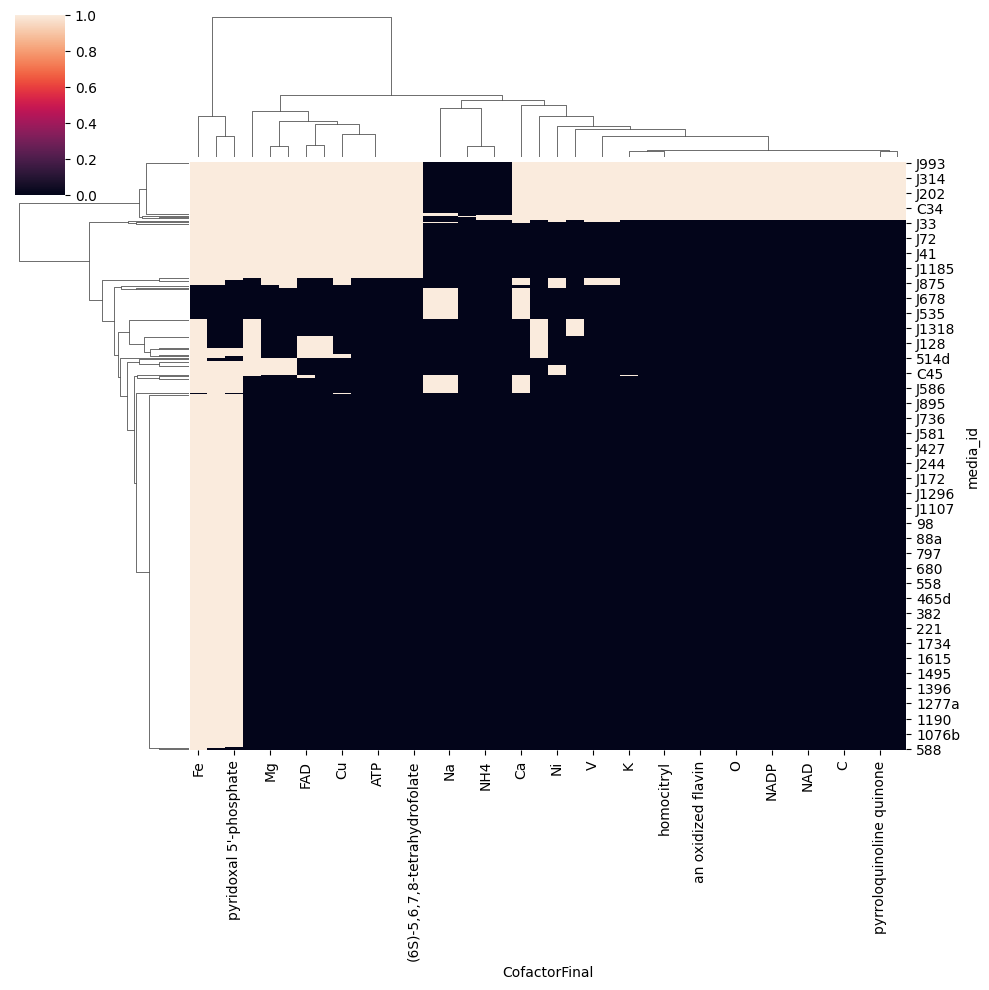

In [68]:
data = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactor-model-media.csv"), low_memory=False)

data = data[["media_id", "CofactorFinal"]].drop_duplicates()
data["count"] = 1
data = pd.pivot_table(data, values='count', index='media_id', columns='CofactorFinal')
data = data.fillna(0)

# Create clustermap
sns.clustermap(data)

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



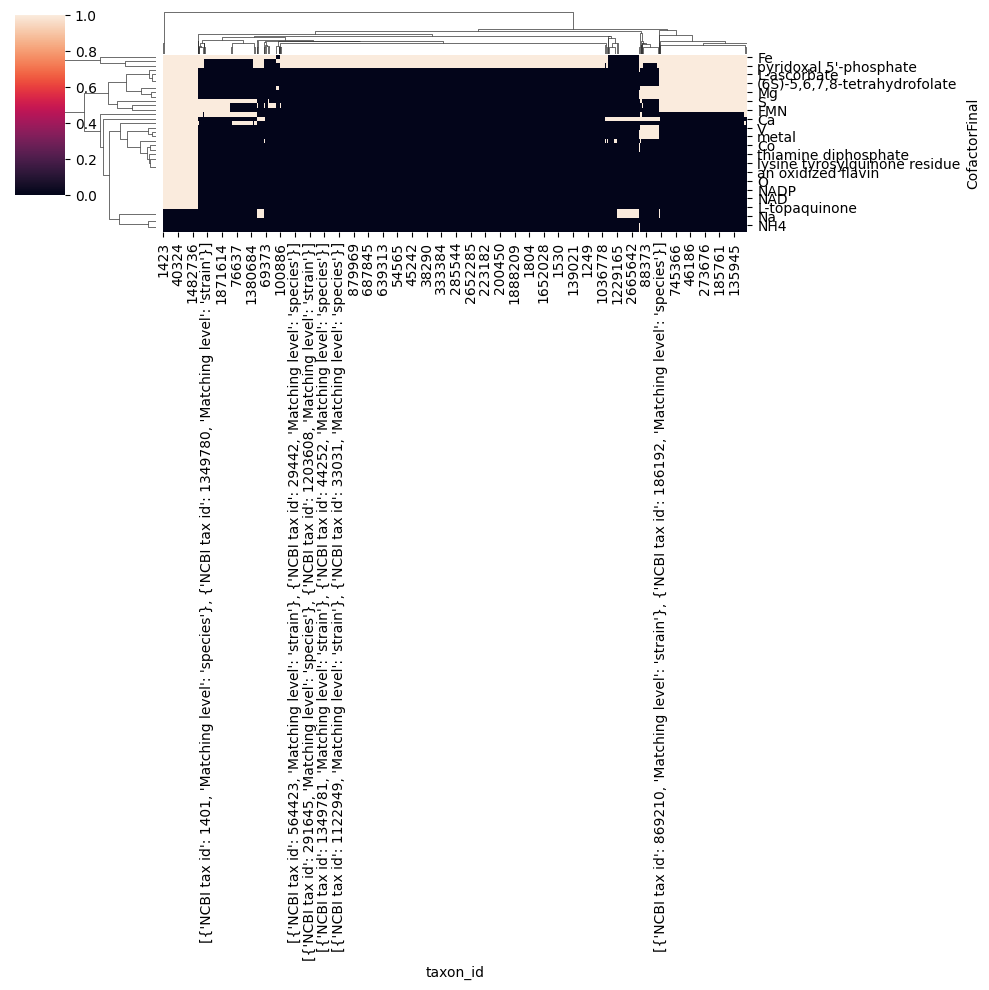

In [73]:
data = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactor-model-media.csv"), low_memory=False)

data = data[["taxon_id", "CofactorFinal"]].drop_duplicates()
data["count"] = 1
data = pd.pivot_table(data, values='count', index='CofactorFinal', columns='taxon_id')
data = data.fillna(0)

# Create clustermap
sns.clustermap(data)

Tree ahaha jkjk unless

In [13]:
import ncbitaxonomist as nt
from Bio import Phylo
import pylab

In [14]:
taxa2ec = pd.read_csv(os.path.join(DATA_DIR, "taxa2ec-final.csv"), low_memory=False)

taxon_id = taxa2ec['taxon_id'].to_list()

# Some NCBI IDs are nested dictionaries, this should extract the ID at the species OR strain level:
data = taxon_id
tax_ids = []

# Loop to extract NCBI tax ids
for item in data:
    if isinstance(item, str) and item.startswith('[') and item.endswith(']'):
        # Parse the string representation of the list of dictionaries
        try:
            dicts = ast.literal_eval(item)
            for d in dicts:
                if d['Matching level'] == 'species':
                    tax_ids.append(d['NCBI tax id'])
        except (ValueError, SyntaxError):
            # Handle cases where the string is not a valid list of dictionaries
            continue

taxa = set(tax_ids)
taxa = list(taxa)
ncbi = {"ncbi_id": taxa}
ncbi_input = pd.DataFrame(ncbi).astype(str)

#ncbi_input.to_csv(os.path.join(DATA_DIR, "ncbi.txt"), index=False)

**Manual steps through NCBI to generate newick / other tree files:**

Make tree file from NCBI ID input: https://www.ncbi.nlm.nih.gov/Taxonomy/CommonTree/wwwcmt.cgi

Turn the file into a viewable format: https://www.ncbi.nlm.nih.gov/projects/treeview/tv.html?appname=ncbi_tviewer&renderer=radial&openuploaddialog

Eventually replace with a python tree constructor or R

In [12]:
# Using this package all tree files must be in the working directory, can't call on filepaths for some reason

# "Pretty" tree -- too many labels make unreadable
tree = Phylo.read("mediadive-taxa-tree.nwk", "newick")
tree.ladderize()  # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)

# Ascii scrollable tree
tree = Phylo.read("mediadive-taxa-tree.nwk", "newick")
Phylo.draw_ascii(tree)
pylab.show()

BacDive tree (parsing (again) NCBI IDs, filtering for type strains)

In [16]:
bacdive = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "bacdive-all.csv"), low_memory=False)
bacdive = bacdive[["bacdive_id","taxon_id", "ncbi_tax_id_matching_level", "type_strain"]]

# Filter for type strains and NCBI species level
type = bacdive["type_strain"].str.contains("yes")
#species = bacdive["ncbi_tax_id_matching_level"].str.contains("species")
bacdive = bacdive[type]

# Parsing cluster fuck NCBI IDs [{},{},{}, ... ] ...
ncbi_tax_ids = []
matching_levels = []

for item in bacdive['taxon_id']:
    tax_id = None  # Default to None if no species-level match is found
    matching_level = None  # Default to None if no species-level match is found
    if isinstance(item, str) and item.startswith('[') and item.endswith(']'):
        try:
            dicts = ast.literal_eval(item)
            for d in dicts:
                if d.get('Matching level') == 'species':
                    tax_id = d.get('NCBI tax id')
                    matching_level = 'species'
                    break  # Stop after finding the first match at the species level
        except (ValueError, SyntaxError):
            tax_id = None  # Handle cases where the string is not a valid list of dictionaries
            matching_level = None
    ncbi_tax_ids.append(tax_id)
    matching_levels.append(matching_level)

# Reformatting of dataframes
parsed = pd.DataFrame(columns=["taxon_id", "ncbi_tax_id_matching_level"])
parsed["taxon_id"] = ncbi_tax_ids
parsed["taxon_id"] = parsed["taxon_id"].astype(str)
parsed["ncbi_tax_id_matching_level"] = matching_levels
NaN = parsed["taxon_id"].str.contains("NaN")
parsed = parsed[~NaN].dropna()

# Concattonating dataframes
taxa = [bacdive, parsed]
ncbi = pd.concat(taxa)
ncbi["taxon_id"] = ncbi["taxon_id"].astype(str)
NaN = ncbi["taxon_id"].str.contains("NaN")
ncbi = ncbi[~NaN].dropna()
types = ncbi[["taxon_id"]]

#types.to_csv(os.path.join(DATA_DIR, "types.txt"), index=False)

In [ ]:
#tree = Phylo.read("genus2.nwk", "newick")
#Phylo.draw_ascii(tree)
#pylab.show()

Model Comparison (reduced dataframes)

In [2]:
taxa = pd.read_csv(os.path.join(DATA_DIR, "models", "taxa-model.csv"))
media = pd.read_csv(os.path.join(DATA_DIR, "models", "media-model.csv"))
comp = pd.read_csv(os.path.join(DATA_DIR, "models", "comp-model.csv"))

In [3]:
m_ec = media.copy()
m_ec['Cluster'] = m_ec['Cluster'].astype(str) + 'm'
c_ec = comp.copy()
c_ec['Cluster'] = c_ec['Cluster'].astype(str) + 'c'

models = [m_ec, c_ec]
mdf = pd.concat(models)
mdf.head()

,Component 1,Component 2,Component 3,Component 4,Cluster,taxon_id,media_id
0,14.400808,16.690296,-42.231613,3.546524,2m,1849278,J612
1,14.366984,0.021583,3.274948,-11.788797,0m,58172,465h
2,14.390467,16.631023,-42.256676,3.534129,2m,"[{'NCBI tax id': 1076594, 'Matching level': 's...",J710
3,14.275699,0.048408,3.279351,-11.744470,0m,158877,J12
4,14.257394,0.857795,3.285041,-11.761877,0m,576611,J346


In [4]:
import plotly.express as px

fig = px.scatter_3d(
    data_frame=mdf,
    x="Component 1",
    y="Component 2",
    z="Component 3",
    color="Cluster",
    #color_discrete_sequence=px.colors.qualitative.Pastel,
    hover_data=[
        "taxon_id",
        "media_id"
    ],
    template="plotly_white"
)
fig.show()

In [4]:
import pandas as pd
import os
DATA_DIR = "~/Desktop/code/data/"
t_ec = pd.read_csv(os.path.join(DATA_DIR, "models", "taxa-model.csv"))
m_ec = pd.read_csv(os.path.join(DATA_DIR, "models", "media-model.csv"))
c_ec = pd.read_csv(os.path.join(DATA_DIR, "models", "comp-model.csv"))

In [5]:
tc = t_ec[["taxon_id", "media_id", "Cluster"]].astype(str)
mc = m_ec[["taxon_id", "media_id", "Cluster"]].astype(str)
cc = c_ec[["taxon_id", "media_id", "Cluster"]].astype(str)

df = pd.merge(left=tc, right=mc, on="taxon_id")
df.head()


,taxon_id,media_id_x,Cluster_x,media_id_y,Cluster_y
0,28123,J84,2,J84,0
1,173363,J22,3,J22,0
2,"[{'NCBI tax id': 1218111, 'Matching level': 's...",J346,0,J739,2
3,411570,J14,2,J84,0
4,574718,J26,3,J26,0


In [14]:
len(df)

2161

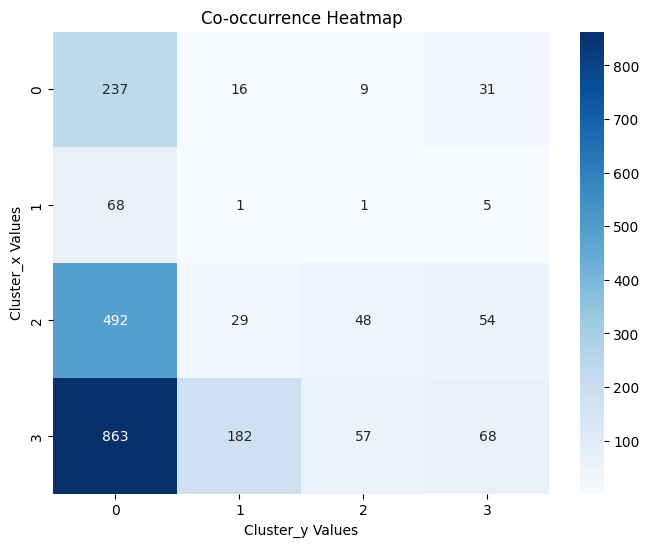

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the co-occurrence matrix
co_occurrence = pd.crosstab(df['Cluster_x'], df['Cluster_y'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence, annot=True, cmap='Blues', fmt='d')
plt.title('Co-occurrence Heatmap')
plt.xlabel('Cluster_y Values')
plt.ylabel('Cluster_x Values')
plt.show()
